**Introducción a las redes neuronales y su aplicación en Geociencia**  by Karen Cruz in licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0?ref=chooser-v1">Attribution-NonCommercial-NoDerivatives 4.0 International</a>

# Datasets

<font size=4 color='blue'>
    
## Generación de las muestras



<font size=5 color='b'>

1.  Se genera un conjunto de numeros aleatorios ($(x_1,y_1),(x_2,y_2),…,(x_n,y_n)$)

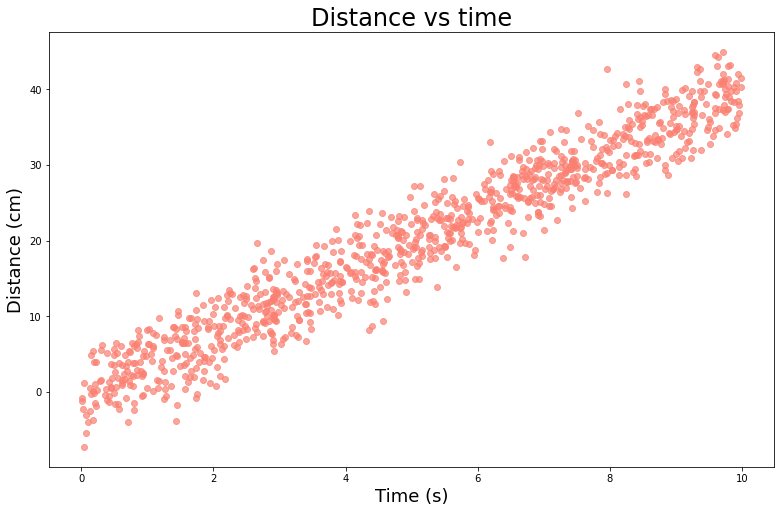

In [ ]:
#Se modelan un conjunto de datos (muestras)
#En una versión futura del código, estos serán sustituidos por datos 
#medidos experimentalmente, y simplemente serán leidos.

import numpy as np
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

def generador_datos_simple(beta, m, desviacion):
    
    np.random.seed(3)
    
    x = np.random.random(m) * 10
    
    # x es arreglo con m numeros aleatorios entre 0 y 100
    
    e = np.random.randn(m) * desviacion
    
    # e es un error generado aleatoriamente

    y = x * beta + e
    
    # se obtienen los valores de y 
    # x*beta es el valor real, sumando los errores, e, se alejan los puntos de la recta.
    
    return x.reshape((m,1)), y.reshape((m,1))
 
desviacion = 3
beta = 4
m = 1000

x, y = generador_datos_simple(beta, m, desviacion)
plt.figure(figsize=(13,8)) 
plt.scatter(x, y, color='salmon', alpha=0.7)
plt.title('Distance vs time', size=24)
plt.xlabel('Time (s)', size=18)
plt.ylabel('Distance (cm)', size=18);

plt.show()

<font size=5 color ='blue'>
Se generan histogramas de los datos originales, tanto de (x) como de (y)

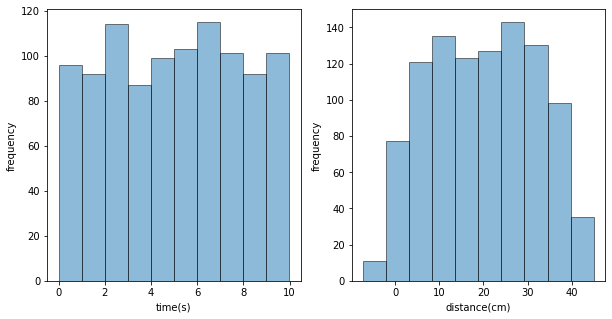

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.hist(x, edgecolor='black', alpha=0.5)
plt.xlabel('time(s)')
plt.ylabel('frequency')


plt.subplot(1, 2, 2)
plt.hist(y, edgecolor='black', alpha=0.5)
plt.xlabel('distance(cm)')
plt.ylabel('frequency');

<font size =4, color = 'blue'>
    
 ## Normalizacion de las muestras.
 

<font size=5, color='blue'>
Normalización

Es importante normalizar las muestras para que cada rasgo tenga el mismo rango y así evitamos un posible sesgo.

In [ ]:
mean_distance = np.mean(y)
std_distance = np.std(y)

y = (y-mean_distance)/(std_distance)

mean_time = np.mean(x)
std_time = np.std(x)

x = (x-mean_time)/(std_time)

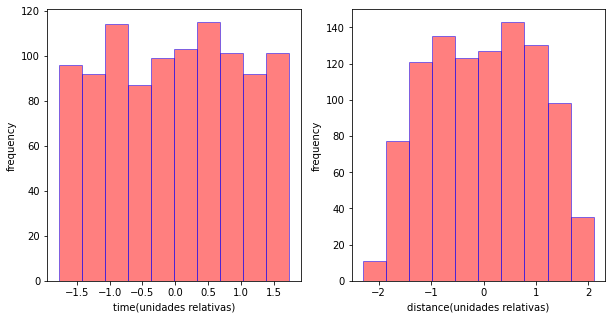

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.hist(x, color='red', edgecolor='b', alpha=0.5)
plt.xlabel('time(unidades relativas)')
plt.ylabel('frequency')


plt.subplot(1, 2, 2)
plt.hist(y, color='red', edgecolor='b', alpha=0.5)
plt.xlabel('distance(unidades relativas)')
plt.ylabel('frequency');

<font size=2, color='blue'>
    
# Buscando la correlación entre las muestras:



<font size=5, color='blue'>
    
En el siguiente código se implementa la generación del error cuadrático medio dada una función específica definida por los pesos iniciales w = weight_0, y b = bias_0.

<font size =4>
    

Los parámetros *w* y *b* se eligen al azar: 

``` python 

weight_0 = random.random()  # It generates a random float number between 0.0 and 1.0
 
bias_0 = random.random()    # It generates a random float number between  0.0 and 1.0

```

In [ ]:
import random

random.seed(1)

weight_0 = random.random()
bias_0 = random.random()

print(weight_0, bias_0)

0.13436424411240122 0.8474337369372327


<font size=5 color="blue">

Se grafica la correspondiente función f, junto con los puntos que representan a las muestras

residuo: 1.4765


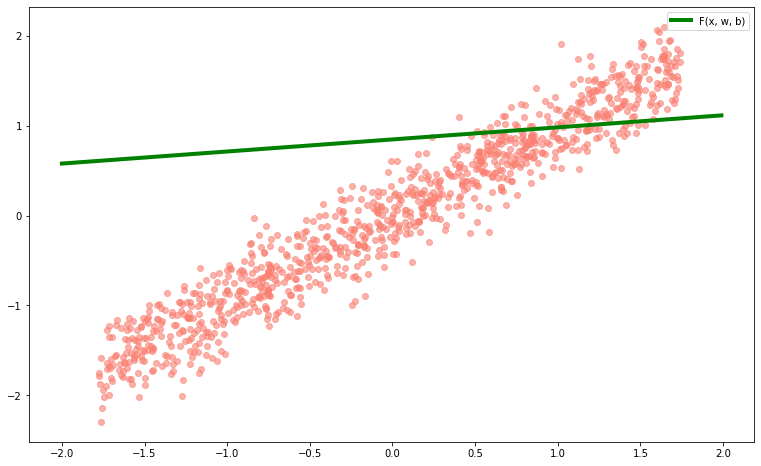

In [ ]:

#The following arrays are generated for plotting the Function F(x, weight_0, bias_0)
x_ = np.arange(-2, 2.0, 0.01)
y_ = weight_0*x_ + bias_0


# Using this function F, the residuos is calculated by comparin the calculated and measured values

residuo = 0

for i in range(len(x)):

    residuo += np.squeeze((y[i]-weight_0*x[i] - bias_0)**2)

residuo = residuo/len(x)

print('residuo: %.4f' %residuo)


#Samples and function F are plotted
plt.figure(figsize=(13,8))

#Plotting function
plt.plot(x_, y_, color='green', lw=4, label='F(x, w, b)')
plt.legend()

#Plotting samples
plt.scatter(x, y, color='salmon', alpha=0.6);

<font size=5, color='blue'>
Se varian los valores de los parámetros w y b buscando reducir el residuo.

<font size=5, color='blue'>

Se emplea el método de gradiente descendente.

<font size=4 color='black'>
    
Los parámetros $\omega$ y $b$ se deben actualizar, de manera que el MSE disminuya. 

Los parámetros se actualizan usando la siguientes ecuaciones:

$$ \omega := \omega - \alpha \dfrac{\partial MSE(\omega, b)}{\partial \omega}$$

$$ b := b - \alpha \dfrac{\partial MSE(\omega, b)}{\partial b}$$

$\alpha$: tasa de aprendizaje, es un hiperparámetro del modelo, y controla la velocidad con que el modelo aprenderá a ajustar a los parametros $\omega$ y $b$.


En este caso

$$ MSE = \dfrac{1}{m}∑_{i=1}^{m}(f(xi) - y)_{i}^{2} = \dfrac{1}{m}∑_{i=1}^{m}(\omega x_i + b -y_i)^2 $$

Entonces

$$ \dfrac{\partial MSE(\omega, b)}{\partial \omega} = \dfrac{2}{m}∑_{i=1}^{m}[(\omega x_i + b -y_i)(x_i)]$$

$$ \dfrac{\partial MSE(\omega, b)}{\partial b} = \dfrac{2}{m}∑_{i=1}^{m}[(\omega x_i + b -y_i)]$$



In [ ]:
#Function to update weight and bias

def update_parameters(x, y, weight, bias, alfa, iteraciones):
    
    # inicializacion de parametros

    alfa = alfa
    residuo = 0
    d_w = 0.0
    d_b = 0.0
    m = len(x)

    # Especificaciones de las graficas
    
    plt.figure(figsize=(20,8))
    plt.subplot(1, 2, 1)
    plt.scatter(x, y, color='salmon', alpha=0.7)

    plt.title('Distance vs time', size=24)
    plt.xlabel('Time (s)', size=18)
    plt.ylabel('Distance (cm)', size=18)

    # Recta generada con los parametros iniciales

    y_ = weight*x_ + bias
    
    plt.subplot(1, 2, 1)
    plt.plot(x_, y_, color='green', lw=4 )
    
    weights = []
    biases = []
    residuos = []
    
    for i in range(iteraciones):

        # calculo de derivadas y el residuo

        for i in range(m):
            r = (y[i]-weight*x[i] - bias)**2
            d_w += 2*(weight*np.squeeze(x[i])+bias-np.squeeze(y[i]))*(np.squeeze(x[i]))
            d_b += 2*(weight*np.squeeze(x[i])+bias-np.squeeze(y[i]))
            residuo += np.squeeze(r)
        residuo /= m
        d_w /= m
        d_b /= m

        # Actualizacion de los parametros

        weight = weight - alfa*d_w
        bias = bias - alfa*d_b
        
        weights.append(weight)
        biases.append(bias)
        residuos.append(residuo)

        # Recta generada con la actualizacion de los parametros

        y_ = weight*x_ + bias
        plt.subplot(1, 2, 1)
        plt.plot(x_, y_, lw=4 )

        # Grafica de los residuos como funcion de uno de los parametros (el peso)

        plt.subplot(1, 2, 2)
        plt.scatter(weight, residuo)
        plt.title('MSE vs weight', size=24)
        plt.xlabel('weight', size=18)
        plt.ylabel('MSE', size=18)
        

    return weights, biases, residuos

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

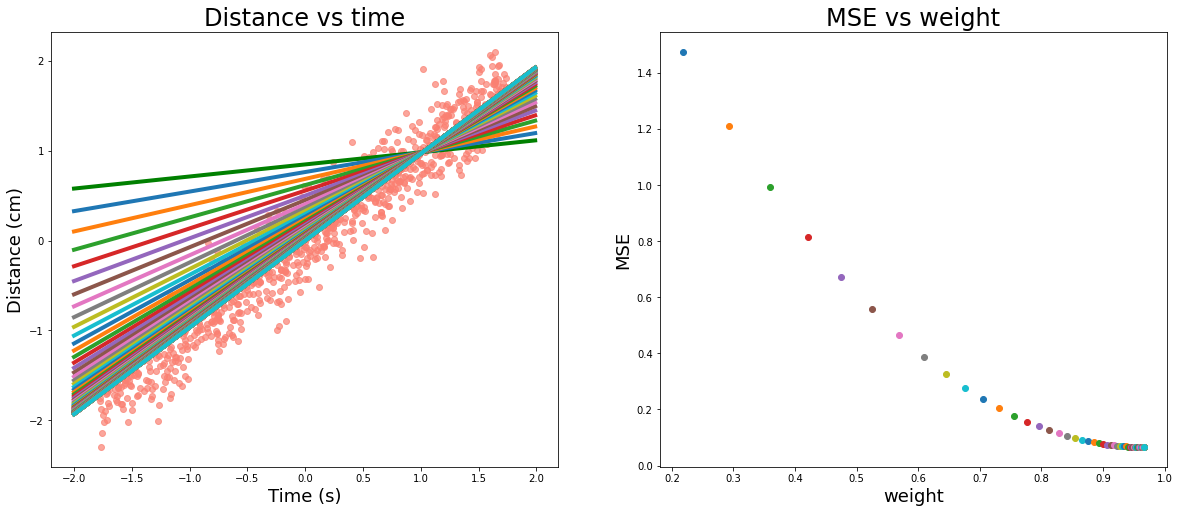

In [ ]:
# inicializacion de parametros

weight = weight_0 
bias = bias_0 
alfa = 0.05
num_iter = 100
weights_100, biases_100, residuos_100 = update_parameters(x, y, weight, bias, alfa, num_iter)

<font size=5, color='blue'>
Se grafica el residuo como función de cada iteración en que se modificaron el bias y el peso.

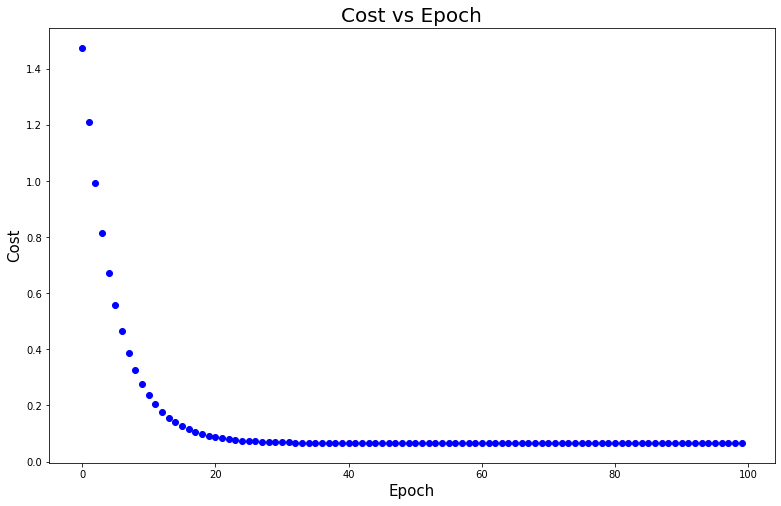

In [ ]:
plt.figure(figsize=(13, 8))
plt.scatter(range(num_iter), residuos_100, color='blue')
plt.title('Cost vs Epoch', size=20)
plt.xlabel('Epoch', size=15)
plt.ylabel('Cost', size=15);

<font size=5, color='blue'>
El total de los datos son divididos en dos grupos: uno con el 90 % de los datos y el segundo con el restante 10 %

<font size=4>
    
La funcion shuffle reordena de forma aleatoria la posicion de un conjunto de datos en una lista.

     x = [ 1, 5, 7, 3, 8]
     shuffle(x) = [5, 8, 3, 1, 7]

 La funcion zip permite hacer conjuntos ordenados de datos combinando dos vectores de igual dimensión, por ejemplo

     x = [1, 2, 3]
     y = [5, 6, 7]
    
     zip(x, y) = ((1, 5), (2, 6), (3, 7))
    
 De esta manera, junto con la funcion shuffle, se asegura que los datos correspondientes a x y y intercambian su posición de la misma manera.
 
 Por otra parte, la operación zip(*c)
 
     (x, y) = zip(*c)
     
Separa a los datos x e y, ya mezclados.

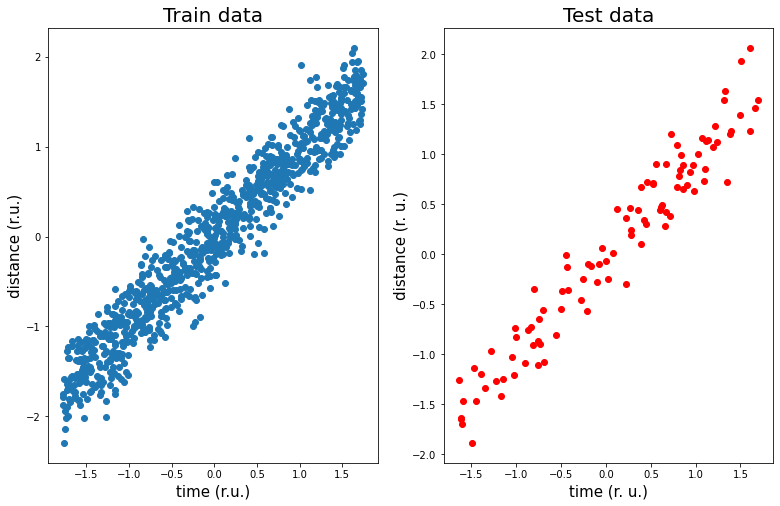

In [ ]:
# Los datos se cambian de posicion aleatoriamente
from random import shuffle
c = list(zip(x, y)) 
shuffle(c)
(x, y) = zip(*c) 

# Los datos se dividen
datos_90 = (x[0:int(0.90*len(x))], y[0:int(0.90*len(y))])
datos_10 = (x[int(0.90*len(x)):], y[int(0.90*len(y)):])

plt.figure(figsize=(13, 8))
plt.subplot(1, 2, 1)
plt.scatter(datos_90[0], datos_90[1])
plt.title('Train data', size=20)
plt.xlabel('time (r.u.)', size =15)
plt.ylabel('distance (r.u.)', size =15)
plt.subplot(1, 2, 2)
plt.scatter(datos_10[0], datos_10[1], color='red')
plt.title('Test data', size=20)
plt.xlabel('time (r. u.)', size =15)
plt.ylabel('distance (r. u.)', size =15);

<font size=5, color='blue'>
Se vuelve a correr el ajuste de datos empleando el metodo de gradiente descendente, pero usando sólo el conjunto de datos correspondiente al 90 %

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

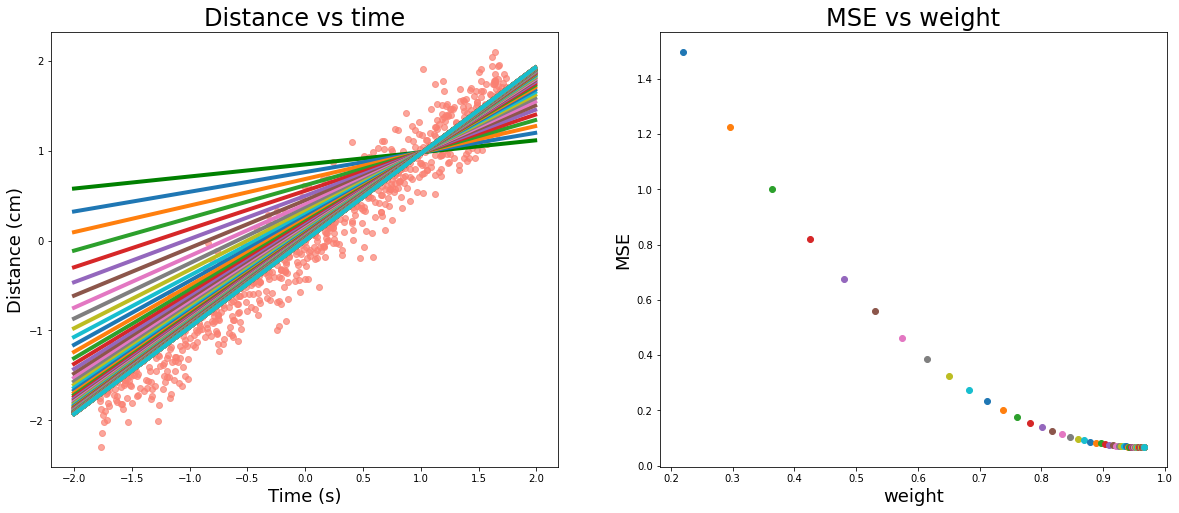

In [ ]:

weight = weight_0 
bias = bias_0 
alfa = 0.05
num_iter = 100
weights_90, biases_90, residuos_90 = update_parameters(datos_90[0], datos_90[1], weight, bias, alfa, num_iter)


<font size=5, color='blue'>
Graficar el nuevo error cuadrático medio como función de cada paso


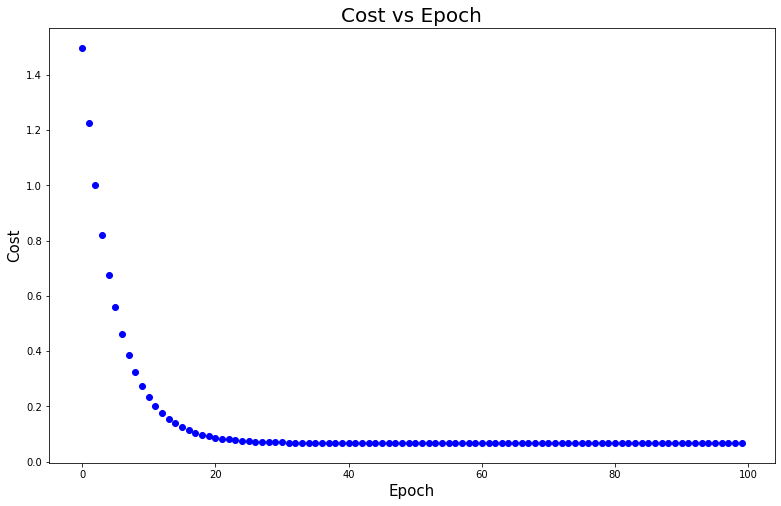

In [ ]:
plt.figure(figsize=(13, 8))
plt.scatter(range(num_iter), residuos_90, color='blue')
plt.title('Cost vs Epoch', size=20)
plt.xlabel('Epoch', size=15)
plt.ylabel('Cost', size=15);

<font size=5, color='blue'>
Con los valores optimos del bias y el peso se calcula el error cuadrático medio que se obtiene con el 10 % de los datos restantes.

In [ ]:
def residuo(x, y, weight, bias):
    r = 0
    m = len(x)
    for i in range(m):
        r += np.squeeze((y[i]-weight*x[i] - bias)**2)
    r /= m
    return r

In [ ]:
print("Residuo =  %.5f" %np.squeeze(residuo(datos_10[0], datos_10[1], weights_90[-1], biases_90[-1])))

Residuo =  0.05333


<font size=4 color='red'>
    
## Aplicación de la matemática hasta ahora desarrollada al problema del aprendizaje


<font size=4 color='black'>

Se tiene un conjunto m de datos $(x_i, y_i)$ en donde los valores $y_i$ dependen de la variable $x_i$. En el área de aprendizaje, se busca encontrar una función $f(x)$ que determine esta dependencia. En una primera aproximación se propone una relación lineal para esta dependendencia.

A la variable $y$ se le asigna con el nombre de target (objetivo), mientras que a la variable $x$ se le asigna con el nombre de feature (rasgo).  

Para determinar esta función, se parte de un conjunto de funciones descritas por la siguiente relación

$$ f(x, w, b) = b + w x $$

Cada par de valores $(b, w)$ determina una función.

Para encontrar la función $f(x)$, se divide el conjunto total de datos en tres conjuntos. 
El primero de ellos (conjunto para el entrenamiento) se emplea para determinar (aprender) los parámetros $b$ y $w$ que van a definir la función $f(x)$. Este conjunto contiene del orden del 80 % del total de los datos. A este se le llama el conjunto de entrenamiento. 

El segundo conjunto de datos (alrededor del 10 % del total) se emplea para ver en cada iteración cómo varía el error cuadrático medio conforme varían los parámetros $b$ y $w$, y ver cómo se desarrolla el aprendizaje. 

El tercer conjunto de datos (de alrededor del 10 % del total) se emplea para probar qué tan bien la función $f(x, w, b)$ describe la dependencia entre las varialbles $x$, $y$. Por ejemplo, calculando el error cuadrático medio.  





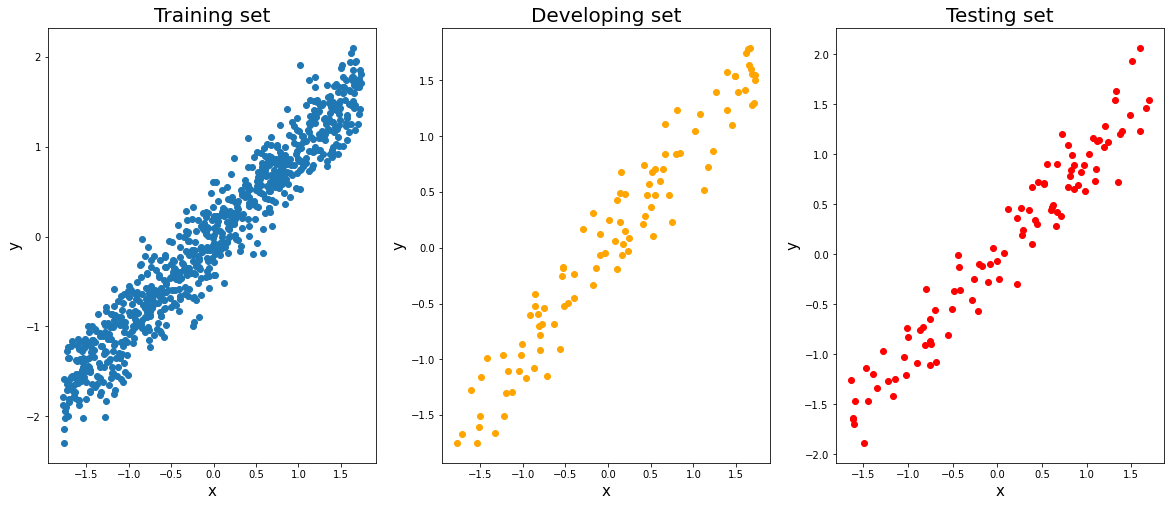

In [ ]:
train_data = (x[0:int(0.80*len(x))], y[0:int(0.80*len(y))])
dev_data = (x[int(0.80*len(x)):int(0.90*len(x))], y[int(0.80*len(x)):int(0.90*len(x))])
test_data = (x[int(0.90*len(x)):], y[int(0.90*len(x)):])

plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.scatter(train_data[0], train_data[1])
plt.title('Training set', size=20)
plt.xlabel('x', size=15)
plt.ylabel('y', size=15)
plt.subplot(1, 3, 2)
plt.scatter(dev_data[0], dev_data[1], color='orange')
plt.title('Developing set', size=20)
plt.xlabel('x', size=15)
plt.ylabel('y', size=15)
plt.subplot(1, 3, 3)
plt.scatter(test_data[0], test_data[1], color='red')
plt.title('Testing set', size=20)
plt.xlabel('x', size=15)
plt.ylabel('y', size=15);


<font size=4>
Se emplea el conjunto de entrenamiento para determinar los parámetros que definen a la función $f(x)$.

<font size=4 color='black'>
Como en cada iteración se emplean diferentes tiempos para optimizar los valores del bias y del peso, la palabra iteración se cambia por la palabra época para describir estos tiempos. Por ello, en lugar de hablar del número de iteraciones, hablaremos del número de épocas.

In [ ]:
def ml_update_parameters(x, y, weight, bias, alfa, epochs):
    
    # inicializacion de parametros

    alfa = alfa
    loss = 0
    d_w = 0.0
    d_b = 0.0
    m = len(x)

    # Especificaciones de las graficas
    
    plt.figure(figsize=(20,8))
    plt.subplot(1, 2, 1)
    plt.scatter(x, y, color='salmon', alpha=0.7)

    plt.title('y vs x', size=24)
    plt.xlabel('x', size=18)
    plt.ylabel('y', size=18)

    # Recta generada con los parametros iniciales

    y_ = weight*x_ + bias
    
    plt.subplot(1, 2, 1)
    plt.plot(x_, y_, color='green', lw=4 )
    
    weights = []
    biases = []
    cost = []
    
    for i in range(epochs):

        # calculo de derivadas y el residuo

        for i in range(m):

            r = (y[i]-weight*x[i] - bias)**2

            d_w += 2*(weight*np.squeeze(x[i])+bias-np.squeeze(y[i]))*(np.squeeze(x[i]))

            d_b += 2*(weight*np.squeeze(x[i])+bias-np.squeeze(y[i]))

            loss += np.squeeze(r)

        loss /= m

        d_w /= m

        d_b /= m

        # Actualizacion de los parametros

        weight = weight - alfa*d_w
        bias = bias - alfa*d_b
        
        weights.append(weight)
        biases.append(bias)
        cost.append(loss)

        # Recta generada con la actualizacion de los parametros

        y_ = weight*x_ + bias
        plt.subplot(1, 2, 1)
        plt.plot(x_, y_, lw=4 )

        # Grafica de los residuos como funcion de uno de los parametros (el peso)

        plt.subplot(1, 2, 2)
        plt.scatter(weight, loss)
        plt.title('Cost vs weight', size=24)
        plt.xlabel('weight', size=18)
        plt.ylabel('Cost', size=18)
        

    return weights, biases, cost

<font size=5 color='blue'>

En los sistemas de aprendizaje, al error cuadratico medio se le nombra costo o perdida. y se representa con la letra J. Nosotros emplearemos regularmente la palabra costo (cost en inglés).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:64: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

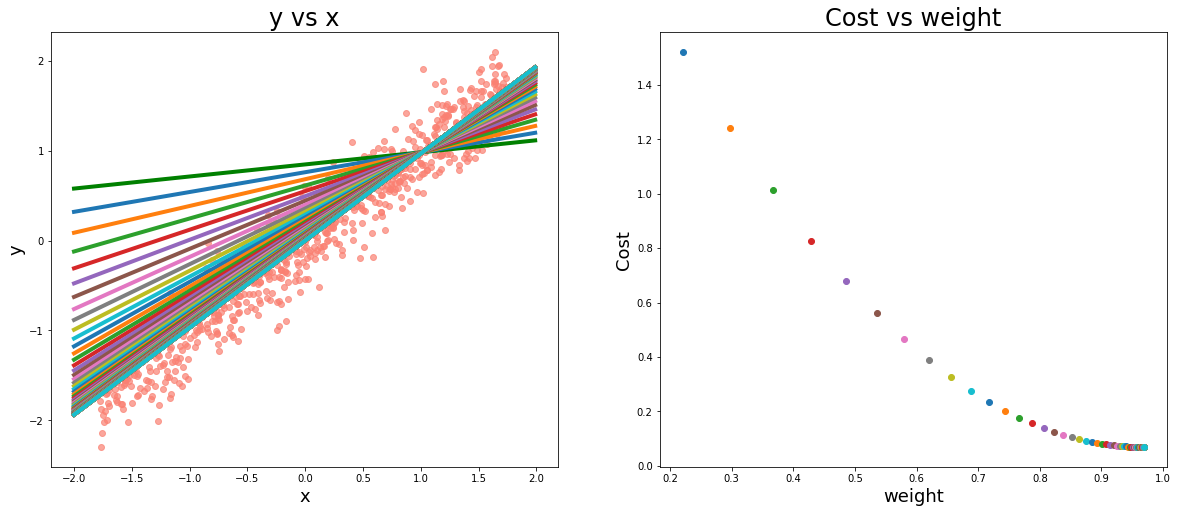

In [ ]:
Realizaweight = weight_0

bias = bias_0
alpha = 0.05

num_epochs = 100

weights_train, biases_train, cost_train = ml_update_parameters(train_data[0], train_data[1], weight, bias, alpha, num_epochs)


In [ ]:
def cost(x, y, weight, bias): 
    residuo = 0
    m = len(x)
    for i in range(m):
        residuo += np.squeeze((y[i]-weight*x[i] - bias)**2)
    residuo /= m
    return residuo

In [ ]:
cost_dev = []
for i in range(len(biases_train)):
    costo = cost(dev_data[0], dev_data[1], weights_train[i], biases_train[i])
    cost_dev.append(costo)

In [ ]:
#cost_test

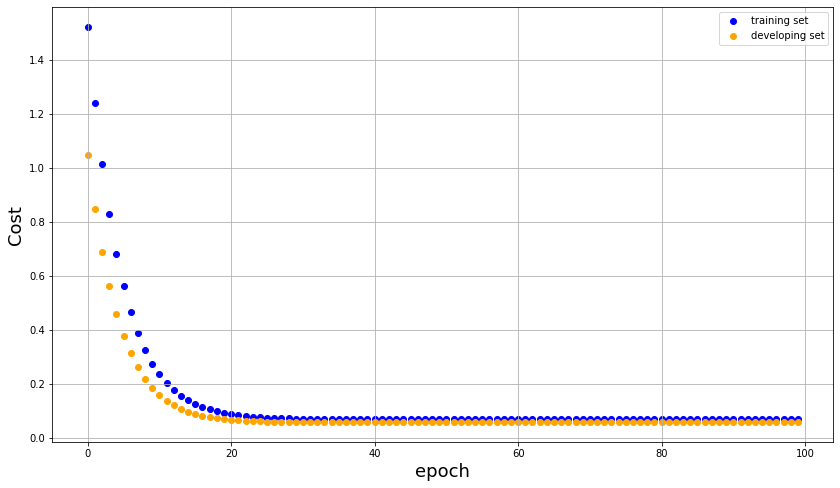

In [ ]:
plt.figure(figsize=(14, 8))
plt.grid(True)
plt.scatter(range(num_epochs), cost_train, color='blue')
plt.scatter(range(num_epochs), cost_dev, color='orange')
plt.xlabel('epoch', size=18)
plt.ylabel('Cost', size=18)
plt.legend(labels=['training set', 'developing set']);

<font size=5 color='blue'>
Empleando la función F(x, b, w) aprendida con el entrenamiento, se calcula el costo asociado al conjunto de prueba.

In [ ]:
cost_test = cost(test_data[0], test_data[1], weights_train[-1], biases_train[-1])
print('cost_test: %.5f' %cost_test)

cost_test: 0.05330


<font size=4 color='rosybrown'>  Train, development and test sets




Para implementar un modelo de machine learning, el conjunto de datos se debe repartir en tres conjuntos:

| Train | Development | Test |
| --- | --- | --- |
| se usa para entrenar | se usa para validar la | se usa para probar |
| al modelo | arquitectura del modelo entrenado | al modelo entrenado |


Tanto el conjunto de entrenamiento (train) como el de validacion o development (dev) se usan en el proceso de entrenamiento del algoritmo, la diferencia entre estos es que es con el conjunto de train con el que se 'aprenden' (se encuentran los pesos y biases optimos, es decir, los que minimizan a la funcion de costo) a los parametros, una vez que se tienen los parametros, el modelo realiza una evaluacion sobre el conjunto dev. 


Surge una primera pregunta: **¿Qué proporcion de datos se va a usar para cada conjunto?**

1. El *conjunto de entrenamiento* tiene que ser el mas numeroso porque es con estos datos que el algortmo va a generar una funcion que 'aprenda' a relacionar a los datos que estamos interesados en correlacionar. 

2. El *conjunto de validacion* debe seguir un comportamiento similar al conjunto de entrenamiento, por lo que tienen que ser suficientes. 'suficiente' dependera de la cantidad de datos que tenga el conjunto original. 

3. El *conjunto de prueba* es mas pequeño, pues este se usara solo para probar al modelo, es decir, una vez entrenado este, queremos ver, con datos que nunca ha visto el modelo, qué tan bien aprendio. 

<img src="https://drive.google.com/uc?id=1T_8aB0X4ndxcdXUqxN44bYlBaw8DBqNQ" align = "center" >


Por lo general, los conjuntos de validacion y de prueba tienen la misma cantidad de muestras. 

**Ejemplo**

Si tenemos 100 muestras, 70 de ellas se usaran para entrenar al modelo, 15 para validarlo y el resto para probarlo. Supongamos que los datos corresponden a la altura de cien personas. Si realizamos el histograma de las 70 muestras de entrenamiento, observaremos que parecen seguir una distribucion gaussiana:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Para ejecutar la siguiente celda debes subir el archivo weight-height.csv

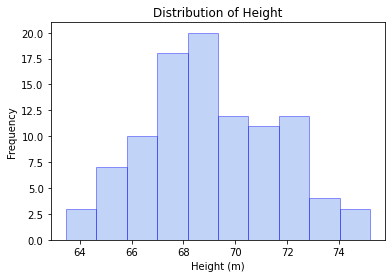

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('weight-height.csv')
df_1 = df[:100]
df_2 = df[:15]
# Histogram of the height
df_1.Height.plot(kind='hist',color='cornflowerblue',edgecolor='b', alpha=0.4)
plt.title('Distribution of Height')
plt.xlabel('Height (m)')
plt.ylabel('Frequency');

<font size=4>
¿Qué pasa si realizamos el histograma de las 15 muestras de validacion?, dificilmente, al tratarse de tan pocos datos, se lograra ver una distribucion gaussiana:

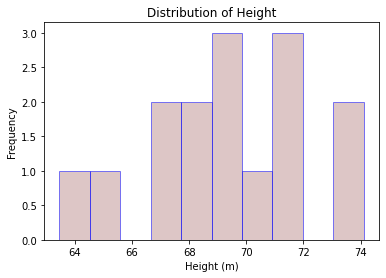

In [ ]:
# Histogram of the height
df_2.Height.plot(kind='hist',color='rosybrown',edgecolor='b', alpha=0.5)
plt.title('Distribution of Height')
plt.xlabel('Height (m)')
plt.ylabel('Frequency');

Es por eso que la cantidad de muestras para cada conjunto depende del numero de muestras que se tenga en total, cuidando siempre que el conjunto de validacion sea suficiente para que tenga un comportamiento parecido al del conjunto de entrenamiento. 

Una segunda pregunta podria ser: **¿De dónde provienen los conjuntos de datos?**

Dado que estamos interesados en que un modelo aprenda, queremos que este generalice bien. Un ejemplo, si doy pares de numeros: n y m ,con n y m entre 0 y 100, y quiero que el modelo aprenda a multiplicar esos pares de numeros, nos gustaria que tambien aprenda a multiplicar pares de numeros mas grandes que 100, es decir, a partir de la informacion que le dimos queremos que esta aprenda a generalizar la operacion de producto binario. 

*Una practica recomendada es que los conjuntos de validacion y de prueba provengan de la misma distribucion*, y que esta sea diferente a la distribucion del conjunto de entrenamiento. De esta manera, podemos saber si el modelo que aprendio con el conjunto train es capaz de generalizar lo aprendido, es decir, si lo hara bien para el conjunto dev.